In [ ]:
import pandas as pd
import sqlite3
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import make_axes_locatable

pd.options.display.float_format = '{:,.2f}'.format
con = sqlite3.connect('../../datasets/checking-logs.sqlite')

## run a query that gets the `datetime` from the `pageviews` table, selecting only the `users` and not the `admins`

In [ ]:
df = pd.read_sql_query(
    '''
    SELECT 
        uid,
        timestamp AS commits
    FROM checker
    WHERE uid LIKE 'user_%'
    ''',
    con,
    parse_dates=['commits'],
)
df['hour'] = df['commits'].dt.hour
df['weekday'] = df['commits'].dt.dayofweek
df.drop('commits', axis=1, inplace=True)
df

,uid,hour,weekday
0,user_4,5,4
1,user_4,5,4
2,user_4,5,4
3,user_4,5,4
4,user_4,5,4
...,...,...,...
3202,user_1,20,3
3203,user_1,20,3
3204,user_1,20,3
3205,user_1,20,3


In [ ]:
weekday_pivot = df.pivot_table(
    index='weekday',
    columns='uid',
    aggfunc='count',
    values='uid',
    fill_value=0
)
sum = weekday_pivot.sum().sort_values(ascending=False).index
weekday_pivot = weekday_pivot[sum]
weekday_pivot = weekday_pivot.reindex(list(range(7)), fill_value=0)
weekday_pivot

uid,user_4,user_14,user_2,user_25,user_19,user_26,user_20,user_31,user_10,user_3,...,user_17,user_16,user_27,user_15,user_6,user_11,user_7,user_22,user_23,user_0
weekday,,,,,,,,,,,,,,,,,,,,,
0,35,50,24,14,7,0,23,5,0,46,...,8,10,0,0,1,0,0,2,0,3
1,86,87,131,44,9,1,0,0,16,11,...,4,5,0,0,0,0,5,3,0,0
2,33,0,32,15,0,34,8,0,37,0,...,1,0,0,0,4,0,3,0,0,0
3,108,17,4,40,78,51,96,7,77,7,...,17,14,15,5,2,0,0,2,6,0
4,61,0,0,10,10,2,7,35,1,59,...,0,0,0,0,0,0,0,0,0,0
5,0,79,31,66,21,16,3,90,4,3,...,32,0,0,4,2,0,0,0,0,0
6,45,26,13,44,51,69,28,7,2,8,...,0,31,27,20,9,8,0,1,0,0


In [ ]:
hour_pivot = df.pivot_table(
    index='hour',
    columns='uid',
    aggfunc='count',
    values='uid',
    fill_value=0
)
hour_pivot = hour_pivot[sum]
hour_pivot = hour_pivot.reindex(list(range(24)), fill_value=0)
hour_pivot

uid,user_4,user_14,user_2,user_25,user_19,user_26,user_20,user_31,user_10,user_3,...,user_17,user_16,user_27,user_15,user_6,user_11,user_7,user_22,user_23,user_0
hour,,,,,,,,,,,,,,,,,,,,,
0,0,4,0,0,0,4,0,2,0,0,...,0,0,0,0,2,0,0,0,0,0
1,0,6,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,13,0,2,0,0,0,2,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,0,3,6,0,0,10,2,0,3,0,...,1,0,0,0,0,0,0,0,0,0
8,0,6,0,0,0,5,2,0,9,6,...,2,0,0,0,0,0,1,0,1,0


## close the connection to the database

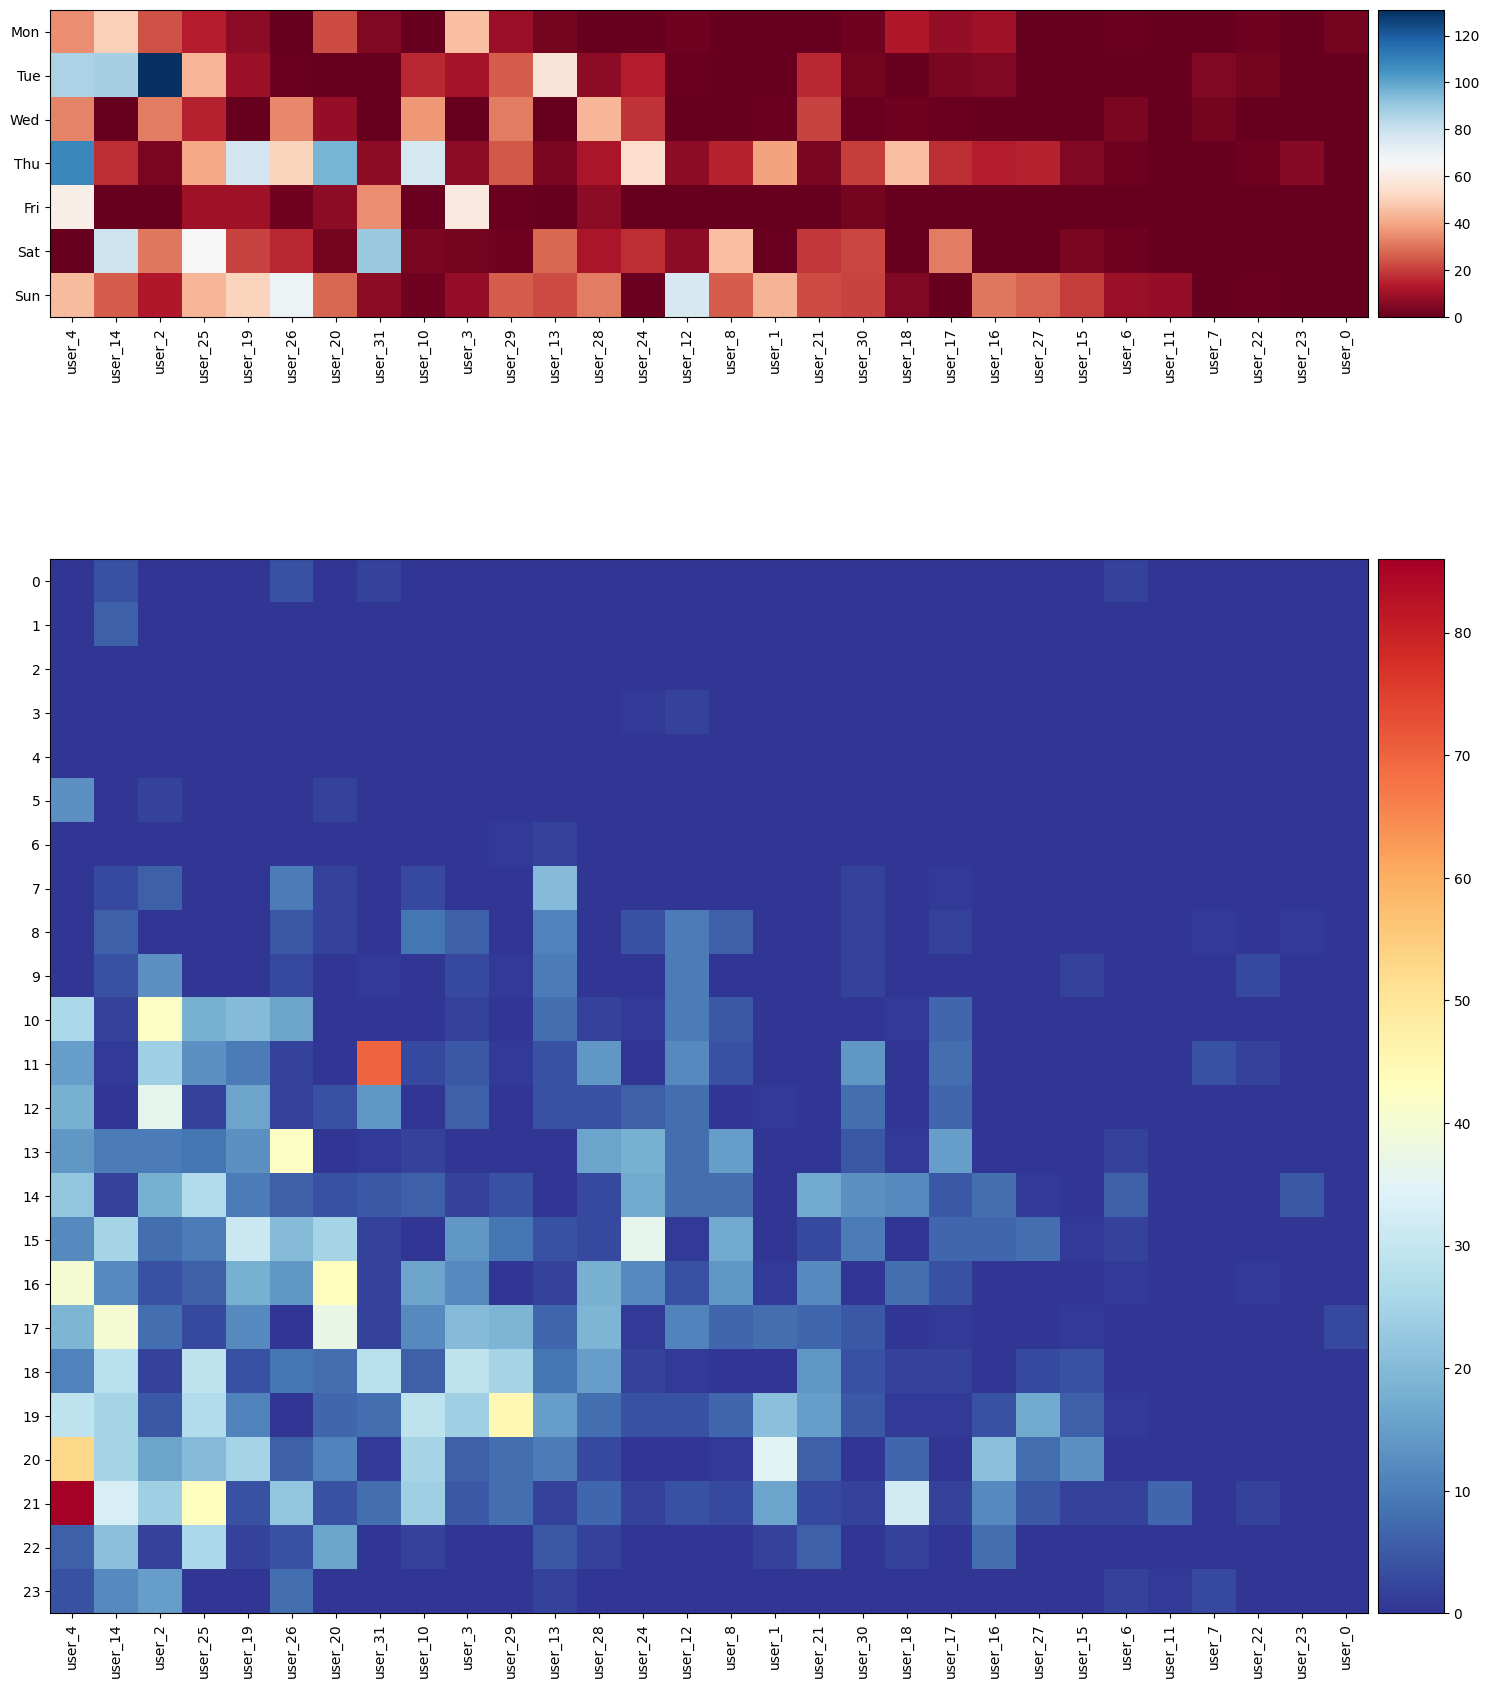

In [ ]:
fig, ax = plt.subplots(2,1, figsize=(15,21))

im1 = ax[0].imshow(weekday_pivot, cmap='RdBu')
divider1 = make_axes_locatable(ax[0])
cax1 = divider1.append_axes('right', size='5%', pad=0.1)
plt.colorbar(im1, cax=cax1)
ax[0].set_xticks(
    range(len(weekday_pivot.columns)),
    labels=weekday_pivot.columns, rotation=90
)
ax[0].set_yticks(
    range(len(weekday_pivot.index)),
    labels=['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']
)

im2 = ax[1].imshow(hour_pivot, cmap='RdYlBu_r')
divider2 = make_axes_locatable(ax[1])
cax2 = divider2.append_axes('right', size='5%', pad=0.1)
plt.colorbar(im2, cax=cax2)

ax[1].set_xticks(range(len(hour_pivot.columns)), labels=hour_pivot.columns, rotation=90)
ax[1].set_yticks(range(len(hour_pivot.index)), labels=hour_pivot.index)

plt.tight_layout()
plt.show()

## Which user has the most commits on Tue?
* user_2
## Which user has the most commits on Thu?
* user_4
## On which weekday do the users not like making a lot of commits?
* Fri
## Which user at which hour made the largest number of commits?
* user_4, 21

In [ ]:
con.close()